In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
cust_churn= pd.read_csv(r'C:\\Users\\rahul\\OneDrive\\Desktop\\ML_DS\\Projects\\Customer_Churn\\Customer_Churn.csv')

In [4]:
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
cust_churn.replace(r"^\s+", np.nan, inplace = True, regex = True)


In [7]:
#fixing data types

to_float = lambda x: float(x)

cust_churn['TotalCharges']= cust_churn['TotalCharges'].apply(to_float)

In [8]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

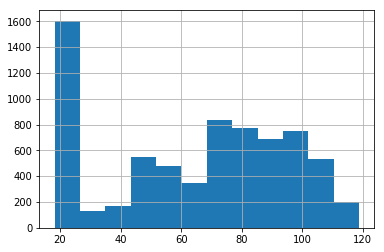

In [9]:
##Exploratory data analysis.

##lets see the distribution of monthly charges for our data set
%matplotlib inline
cust_churn['MonthlyCharges'].hist(bins = 12)

## so we that, most of the customers incur around a 20$ charge monthly

In [10]:
## data clean up -  encoding categorical variables

##since we have just two features were it is 1 and 0 instead of yes and no, lets have standard yes and no for feature var

##not encoding as one hot and stuff because we are not using ML algos here.

##variables

##senior citizen 


##if 1 -- Yes, if 0 -- No

In [11]:
##lets make a quick function for it 

bin_enc = lambda x : 'Yes' if x == 1 else 'No'

In [12]:
cust_churn['SeniorCitizen'] = cust_churn['SeniorCitizen'].apply(bin_enc)

In [13]:
##for churn variable we want 1 for yes and 0 for no

con_tgt= lambda x : 1 if x == 'Yes' else 0

In [14]:
cust_churn['Churn'] = cust_churn['Churn'].apply(con_tgt)

In [15]:
## removing customers with tenure 0.

In [16]:
cust_churn_sub = cust_churn[cust_churn['tenure']!= 0] 

In [17]:
cust_churn_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(2), ob

In [18]:
##sometimes survival times follow some known probability distributions 

##parametric method that assumes the shape of the hazard

##like weibull distribution

##weibull model estimates survival function 

import lifelines

In [20]:
import seaborn as sns

In [21]:
##fiting weibul to the data

## 
weib_model= lifelines.WeibullFitter()

In [23]:
weib_model.fit(durations= cust_churn_sub['tenure'], event_observed= cust_churn_sub['Churn'])

<lifelines.WeibullFitter: fitted with 7032 observations, 5163 censored>

In [28]:
cust_churn_sub['tenure'].max()

72

In [47]:
## def a function that plots a weibull survival curve

def surv_curve_weibull(weibull_model, ax, max_tenure  = 200):
    max_tenure = np.floor(max_tenure).astype(int)
    x = np.array(range(max_tenure))
    y = np.exp(-(weibull_model.lambda_*x)**weibull_model.rho_)  
    ax.plot(x,y, label = weibull_model._label)
    plt.legend()
    

In [39]:
weib_model_1= lifelines.WeibullFitter()

In [41]:
weib_model_1.fit(durations= cust_churn_sub['tenure'], event_observed= cust_churn_sub['Churn'])

<lifelines.WeibullFitter: fitted with 7032 observations, 5163 censored>

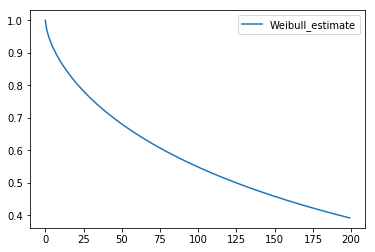

In [48]:
ax =plt.subplot(111)
surv_curve_weibull(weib_model_1, ax)

In [ ]:
##Y axis is prob of survival (prob of not churning)

##The longer the time, the smaller the probability of surviving.

##from the survival curve we see that , even when a customer is as old as 120 months, (10 years)
##their probability of churn is almost  at 50 %. so older custumers should definitely be incentivized

##also note that we only had data till 72 months max, but the weibull distribution is predicting survival prob 
##upto 200 months

In [ ]:
## we can also compare survival curves of customer segments
## like gender segnments - male / female

##like has dependents or not

In [ ]:
##first look at churn rate within these segments
## because survival curve will follow similar pattern




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


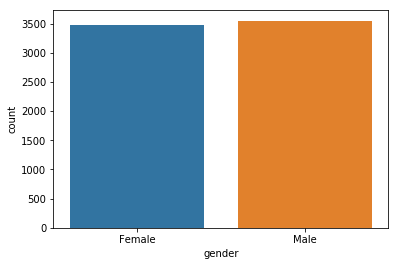

In [49]:
sns.countplot(cust_churn_sub['gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


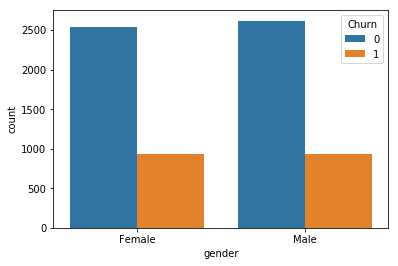

In [50]:
sns.countplot(cust_churn_sub['gender'], hue = cust_churn_sub['Churn'])

In [ ]:
## so males and females churn almost the same.

##so their survival curve must look the same



In [52]:
cust_churn_male= cust_churn_sub[cust_churn_sub['gender'] == 'Male']

In [54]:
cust_churn_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 1 to 7042
Data columns (total 21 columns):
customerID          3549 non-null object
gender              3549 non-null object
SeniorCitizen       3549 non-null object
Partner             3549 non-null object
Dependents          3549 non-null object
tenure              3549 non-null int64
PhoneService        3549 non-null object
MultipleLines       3549 non-null object
InternetService     3549 non-null object
OnlineSecurity      3549 non-null object
OnlineBackup        3549 non-null object
DeviceProtection    3549 non-null object
TechSupport         3549 non-null object
StreamingTV         3549 non-null object
StreamingMovies     3549 non-null object
Contract            3549 non-null object
PaperlessBilling    3549 non-null object
PaymentMethod       3549 non-null object
MonthlyCharges      3549 non-null float64
TotalCharges        3549 non-null float64
Churn               3549 non-null int64
dtypes: float64(2), int64(2), ob

In [55]:
cust_churn_female= cust_churn_sub[cust_churn_sub['gender']== 'Female']

In [57]:
weib_model_males= lifelines.WeibullFitter()
weib_model_females = lifelines.WeibullFitter()

In [66]:
weib_model_males.fit(durations=cust_churn_male['tenure'], event_observed= cust_churn_male['Churn'], label= 'Male')

<lifelines.WeibullFitter: fitted with 3549 observations, 2619 censored>

In [65]:
weib_model_females.fit(durations= cust_churn_female['tenure'], event_observed= cust_churn_female ['Churn'], label= 'Female')

<lifelines.WeibullFitter: fitted with 3483 observations, 2544 censored>

In [ ]:
##indeed as observed below the survival probabilities for these two customer segments are the same

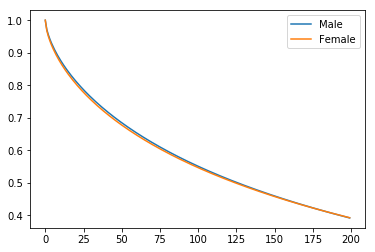

In [67]:
ax = plt.subplot(111)
surv_curve_weibull(weib_model_males, ax)
surv_curve_weibull(weib_model_females, ax)

In [ ]:
##lets analyze a different customer segment this time. say one with /without dependents

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


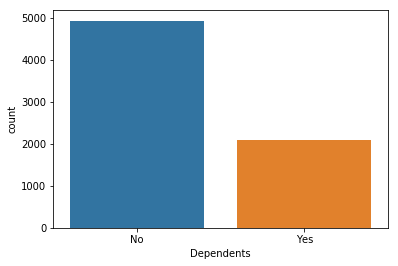

In [70]:
sns.countplot(cust_churn_sub['Dependents'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


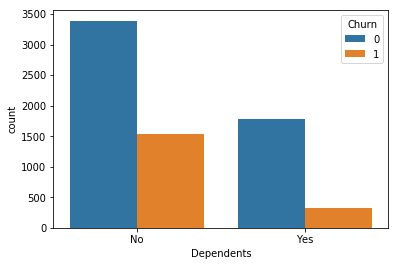

In [71]:
sns.countplot(cust_churn_sub['Dependents'], hue = cust_churn_sub['Churn'])

In [ ]:
##seems that people with no dependents churn more than people with dependents

In [69]:
cust_churn_dep_y  = cust_churn_sub[cust_churn_sub['Dependents'] == 'Yes']

In [72]:
cust_churn_dep_n  = cust_churn_sub[cust_churn_sub['Dependents']== 'No']

In [73]:
weib_model_dep_y= lifelines.WeibullFitter()
weib_model_dep_n = lifelines.WeibullFitter()

In [78]:
weib_model_dep_y.fit(durations= cust_churn_dep_y['tenure'], event_observed= cust_churn_dep_y['Churn'], label= 'dep_y')

<lifelines.WeibullFitter: fitted with 2099 observations, 1773 censored>

In [79]:
weib_model_dep_n.fit(durations= cust_churn_dep_n['tenure'], event_observed= cust_churn_dep_n['Churn'], label= 'dep_n')

<lifelines.WeibullFitter: fitted with 4933 observations, 3390 censored>

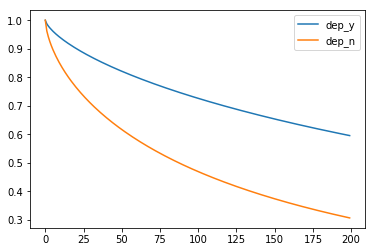

In [80]:
ax = plt.subplot(111)
surv_curve_weibull(weib_model_dep_y, ax)
surv_curve_weibull(weib_model_dep_n, ax)

In [ ]:
# as suspected the customers without dependents survival prob dips more steeply. they are more suspectible to churn.

In [ ]:
###compute survival curves3 for each group and compare the proportions surviving at any specific time. 
#The weakness of this approach is that it does not provide a comparison of the total survival experience 
#of the two groups, but rather gives a comparison at some arbitrary time point(s)

In [ ]:
#the difference in survival is greater at some times than others and eventually becomes zero. (not shown but will happen)
#We describe here the logrank test, the most popular method of comparing the survival of groups, 
#which takes the whole follow up period into account.

#It has the considerable advantage that it does not require us to know anything 
#about the shape of the survival curve or the distribution of survival times.

In [ ]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC403858/

#The logrank test is used to test the null hypothesis that there is no difference between the populations 
#in the probability of an event (here a death) at any time point. 

##The logrank test is most likely to detect a difference between groups when the risk of an event 
#is consistently greater for one group than another. 

#It is unlikely to detect a difference when survival curves cross, as can happen when comparing a medical with a surgical intervention. 
##When analysing survival data, the survival curves should always be plotted.

In [81]:
from lifelines.statistics import logrank_test

In [87]:
t= logrank_test(event_observed_A= cust_churn_dep_y['Churn'].values, event_observed_B= cust_churn_dep_n['Churn'].values, 
             event_times_A= cust_churn_dep_y['tenure'].values, event_times_B = cust_churn_dep_n['tenure'].values)

In [88]:
t.print_summary

# we get P < 0.01, so that the difference between the groups is statistically significant. 

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: 

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p     
      232.6990 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>>

In [ ]:
## survival regression 

##knowing how long customers might stay or when they might churn is insightful. 
#But something even more insightful is what factors influence churn.

#cox regression uses cox proportional hazard model to perform survival regression.
#The main insight the Cox regression model gives us are its coefficients

#The (exponential of the) coefficients correspond to the hazard ratios. 

#hazard ratio is the ratio of hazard rates described by the two levels of an independent variable

In [ ]:
#For example, let's say we've fitted a Cox regression model, and one of the variables is gender. 
#This variable takes on two values: 1 for male, and 0 for female.
#What does it mean if hazard ratio of gender is 1.10? It means that at any time, whether it's 6 months since signing up or 12 months since signing up, 
#males are 10% more likely to churn versus females.


In [90]:
from lifelines import CoxPHFitter

In [91]:
cox_model_1= CoxPHFitter()

In [97]:
T= cust_churn_sub['tenure']

In [98]:
E = cust_churn_sub['Churn']

In [107]:
T.shape

(7032,)

In [108]:
E.shape

(7032,)

In [109]:
cust_churn_sub.shape

(7032, 21)

In [ ]:
##

In [120]:
cox_model_1.fit(df= cust_churn_sub, duration_col= 'tenure', event_col= 'Churn')

TypeError: DataFrame contains nonnumeric columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']. Try using pandas.get_dummies to convert the non-numeric column(s) to numerical data, or dropping the column(s).

In [ ]:
##so we need numeric columns

##https://github.com/CamDavidsonPilon/lifelines/issues/435

In [137]:
cust_churn_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(2), ob

In [159]:
##one hot encoding

keep_cols = ["tenure", "Churn", "PaperlessBilling", "SeniorCitizen", "Dependents", "gender", "PaymentMethod", "Partner", "InternetService", "PhoneService", "Contract"]

In [161]:
##

conv_functn= lambda x: 1 if x == 'Yes' else 0

In [164]:
cust_churn_sub['PaperlessBilling_bin'] = cust_churn_sub['PaperlessBilling'].apply(conv_functn)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
cust_churn_sub['PaperlessBilling_bin']

0       1
1       0
2       1
3       0
4       1
5       1
6       1
7       0
8       1
9       0
10      1
11      0
12      0
13      1
14      1
15      0
16      0
17      0
18      0
19      1
20      1
21      0
22      0
23      1
24      0
25      1
26      1
27      0
28      1
29      1
       ..
7013    1
7014    1
7015    1
7016    0
7017    0
7018    1
7019    0
7020    1
7021    1
7022    1
7023    1
7024    1
7025    1
7026    1
7027    0
7028    0
7029    1
7030    1
7031    0
7032    1
7033    1
7034    1
7035    1
7036    0
7037    1
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling_bin, Length: 7032, dtype: int64

In [167]:
##convert gender to 1 and 0

conv_gen = lambda x: 1 if x == 'Male' else 0

cust_churn_sub['gen_bin']= cust_churn_sub['gender'].apply(conv_gen)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [170]:
 cust_churn_sub['SenCiti_bin']= cust_churn_sub['SeniorCitizen'].apply(conv_functn)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
#dependents, payment method, partner

cust_churn_sub['Dep_bin']= cust_churn_sub['Dependents'].apply(conv_functn)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
cust_churn_sub['Partner_bin']= cust_churn_sub['Partner'].apply(conv_functn)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
cust_churn_sub_contract_fact, ind = pd.factorize(cust_churn_sub['Contract'])

In [191]:
cust_churn_sub_contract_fact

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [195]:
cust_churn_sub_contract_fact.shape

(7032,)

In [181]:
ind



Index(['Month-to-month', 'One year', 'Two year'], dtype='object')

In [183]:
cust_churn_sub_contract_fact_reshapd= cust_churn_sub_contract_fact.reshape(-1,1)

In [198]:
cust_churn_sub['contract_enc'] = pd.Series(cust_churn_sub_contract_fact, index= cust_churn_sub.index.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
cust_churn_sub_1= pd.get_dummies(cust_churn_sub, columns= ['Contract'])

In [205]:
cust_churn_sub_1.shape

(7032, 29)

In [206]:
##lets get the final data frame to be fitted on by cox model

cust_churn_sub_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
customerID                 7032 non-null object
gender                     7032 non-null object
SeniorCitizen              7032 non-null object
Partner                    7032 non-null object
Dependents                 7032 non-null object
tenure                     7032 non-null int64
PhoneService               7032 non-null object
MultipleLines              7032 non-null object
InternetService            7032 non-null object
OnlineSecurity             7032 non-null object
OnlineBackup               7032 non-null object
DeviceProtection           7032 non-null object
TechSupport                7032 non-null object
StreamingTV                7032 non-null object
StreamingMovies            7032 non-null object
PaperlessBilling           7032 non-null object
PaymentMethod              7032 non-null object
MonthlyCharges             7032 non-null float64
TotalCharges               70

In [207]:
keep = ['tenure', 'Churn', 'PaperlessBilling_bin', 'gen_bin','SenCiti_bin', 'Dep_bin', 'Partner_bin', 'Contract_Month-to-month' 
         ,  'Contract_One year',  'Contract_Two year']

In [213]:
keep = ['tenure', 'Churn', 'PaperlessBilling_bin', 'gen_bin','SenCiti_bin', 'Dep_bin', 'Partner_bin']

In [214]:
cust_churn_sub_clean= cust_churn_sub_1.loc[:, keep]

In [215]:
cust_churn_sub_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 7 columns):
tenure                  7032 non-null int64
Churn                   7032 non-null int64
PaperlessBilling_bin    7032 non-null int64
gen_bin                 7032 non-null int64
SenCiti_bin             7032 non-null int64
Dep_bin                 7032 non-null int64
Partner_bin             7032 non-null int64
dtypes: int64(7)
memory usage: 759.5 KB


In [216]:
cox_model_2= CoxPHFitter()

In [217]:
cox_model_2.fit(df= cust_churn_sub_clean, duration_col= 'tenure', event_col= 'Churn')

<lifelines.CoxPHFitter: fitted with 7032 observations, 5163 censored>

In [218]:
cox_model_2.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
PaperlessBilling_bin,0.629491,1.876655,0.053991,11.659165,2.060540e-31,0.523671,0.735312
gen_bin,-0.009787,0.990261,0.046290,-0.211424,8.325562e-01,-0.100512,0.080939
SenCiti_bin,0.371663,1.450144,0.054893,6.770730,1.281338e-11,0.264076,0.479251
Dep_bin,-0.371897,0.689425,0.068070,-5.463429,4.670254e-08,-0.505312,-0.238482
Partner_bin,-0.844477,0.429782,0.053684,-15.730529,9.342662e-56,-0.949695,-0.739258


In [ ]:
##exp(coef )is  hazard ratio

##gender variable's coeff is 1. so that means both male amd female are equally prone to hazard

##paperless_billing - customer's with paperless's billing are 1.8 times more likely to churn than without paperless

##senior citizens are 1.45 times more likely to churn or 45% more likely to churn


#Senior citizenship, having dependents, and having paperless billing are indicative of churn (from significant codes below)

In [219]:
cox_model_2.score_

0.6779418650365937

In [222]:
cox_model_2.print_summary()

n=7032, number of events=1869

                        coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
PaperlessBilling_bin  0.6295     1.8767    0.0540  11.6592 0.0000      0.5237      0.7353  ***
gen_bin              -0.0098     0.9903    0.0463  -0.2114 0.8326     -0.1005      0.0809     
SenCiti_bin           0.3717     1.4501    0.0549   6.7707 0.0000      0.2641      0.4793  ***
Dep_bin              -0.3719     0.6894    0.0681  -5.4634 0.0000     -0.5053     -0.2385  ***
Partner_bin          -0.8445     0.4298    0.0537 -15.7305 0.0000     -0.9497     -0.7393  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.678
Likelihood ratio test = 704.954 on 5 df, p=0.00000


In [ ]:
##so now we not only know churn probability wrt to time 

##but also the factors that most contribute to churn

In [ ]:
##same as in mL we have a regression model that can predict once 

cox_model_2.predict_survival_function